# Deep learning munticlass classification

In this notebook my task is to classify chinese characters using deep learnign. In this case I rather use the tensorflow framework for the Neural Network development.


### Importing the main libraries

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os

## 1 - Visão geral do problema

The problematic here is to determinate which digit is being represented in an image using a RNA. Our Neural Network will caculate which character is the most probable among the 15 possible digits analysing the current image. 

The database used in this notebook is the Chinese-MNIST, https://www.kaggle.com/gpreda/chinese-mnist


## 2 - Dados de treinamento

Características dos dados:

- O banco de dados Chinese MNIST possui 15.000 exemplos;
- Cada exemplo consiste de uma imagem em tons de cinza, de dimensão 64x64 pixels;
- Cada imagem é associada a um rótulo de 15 classes;
- O valor da intensidade luminosa de cada pixel da imagem é um número inteiro entre 0 e 255.

Primeiramente você deve acessar o link do Kaggle onde se encontra os dados e fazer download dos mesmos e descompactar o arquivo. 


### 2.1 Carregar dados

Após descompactar o arquivo com os dados execute as células abaixo para carregar e inspecionar os dados.

Note que os dados devem estar em uma pasta de nome `Chinese_MNIST` e as imagens estão dentro da pasta `Chinese_MNIST/data`.

O arquivo `chinese_mnist.csv` contém os nomes dos arquivos das imagens codificados e as classes de cada imagem.

In [59]:
# Carrega arquivo de informações sobre dados
data_df = pd.read_csv('archive\chinese_mnist.csv')
data_df.head()

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


### 2.2 Inspecionar dados

Vamos verificar o número de dados de cada classe de dígito, se existem dados ausentes e quantos arquivos de imagens existem.

In [60]:
data_df.groupby(["value","character"]).size()

value      character
0          零            1000
1          一            1000
2          二            1000
3          三            1000
4          四            1000
5          五            1000
6          六            1000
7          七            1000
8          八            1000
9          九            1000
10         十            1000
100        百            1000
1000       千            1000
10000      万            1000
100000000  亿            1000
dtype: int64

In [61]:
# Verifica se existem dados ausentes
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
suite_id,0,0.0
sample_id,0,0.0
code,0,0.0
value,0,0.0
character,0,0.0


In [62]:
# Verifica número de arquivos de imagens existentes
image_files = list(os.listdir("/content/drive/MyDrive/Colab Notebooks/Deep Learning/RNA/data/data"))
print("Numero de imagens: {}".format(len(image_files)))

Numero de imagens: 15009


### 2.3 Anexar propriedades das imagens ao dataframe

Como as imagens tem uma convenção de nome de `input_ [siote_id] _ [sample_id] _ [código] .jpg`, devemos criar mais uma coluna no dataframe com o nome do arquivo das imagens para podermos associar cada imagem à sua classe correspondente.

In [63]:
import skimage.io

def image_files(x):
    file_name = f"input_{x[0]}_{x[1]}_{x[2]}.jpg"
    return file_name
data_df["file"] = data_df.apply(image_files, axis=1)

def image_sizes(file_name):
    image = skimage.io.imread("/content/drive/MyDrive/Colab Notebooks/Deep Learning/RNA/data/data/" + file_name)
    return list(image.shape)

data_df = pd.concat([data_df],axis=1, sort=False)

data_df.head()

,suite_id,sample_id,code,value,character,file
0,1,1,10,9,九,input_1_1_10.jpg
1,1,10,10,9,九,input_1_10_10.jpg
2,1,2,10,9,九,input_1_2_10.jpg
3,1,3,10,9,九,input_1_3_10.jpg
4,1,4,10,9,九,input_1_4_10.jpg


## 3. Processamento dos dados

Primeiramente precisamos dividir os dados nos conjuntos de treinamento e teste. Vamos usar 80% para treinamento e 20% para teste/validação.

In [64]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data_df, test_size=0.2, random_state=42, stratify=data_df["code"].values)

print("Train set: {}".format(train_df.shape))
print("Test set: {}".format(test_df.shape))

Train set: (12000, 6)
Test set: (3000, 6)


As imagens precisam ser carregadas, redimensionadas e normalizadas. Para isso vamos usar uma função que carrega as imagens, redimensiona-as para (64, 64) e normaliza os pixels para terem valores reais entre 0 e 1.

Precisamos também de uma função para criar a classe do dígito correspondente a cada imagem.

In [65]:
import skimage.transform

def read_image(file_name):
    print(file_name)
    image = skimage.io.imread("/content/drive/MyDrive/Colab Notebooks/Deep Learning/RNA/data/data/" + file_name)
    image = skimage.transform.resize(image, (64, 64), mode='reflect')
    return image

def categories_encoder(dataset, var='character'):
    X = np.stack(dataset['file'].apply(read_image))
    y = pd.get_dummies(dataset[var], drop_first=False)
    return X, y

X_train, y_train = categories_encoder(train_df)
X_test, y_test = categories_encoder(test_df)

print('Dimensão do tensor das imagens de treinamento:', X_train.shape)
print('Dimensão do tensor das imagens de teste:', X_test.shape)
print('Dimensão do tensor de classes de treinamento:', y_train.shape)
print('Dimensão do tensor de classes de teste:', y_test.shape)

A saída de streaming foi truncada nas últimas 5000 linhas.
input_19_4_3.jpg
input_77_10_9.jpg
input_46_3_8.jpg
input_80_2_6.jpg
input_20_6_6.jpg
input_33_10_8.jpg
input_80_5_8.jpg
input_5_4_9.jpg
input_36_4_15.jpg
input_79_7_8.jpg
input_33_10_1.jpg
input_64_8_7.jpg
input_80_5_10.jpg
input_65_9_13.jpg
input_30_8_1.jpg
input_5_6_3.jpg
input_96_4_9.jpg
input_87_5_1.jpg
input_55_7_9.jpg
input_42_7_1.jpg
input_61_1_11.jpg
input_26_1_9.jpg
input_66_5_4.jpg
input_50_3_3.jpg
input_44_1_11.jpg
input_44_9_14.jpg
input_99_9_3.jpg
input_60_10_5.jpg
input_87_8_8.jpg
input_19_6_12.jpg
input_52_8_10.jpg
input_7_10_6.jpg
input_17_8_9.jpg
input_68_6_13.jpg
input_44_8_1.jpg
input_23_5_12.jpg
input_71_3_6.jpg
input_41_2_11.jpg
input_88_1_8.jpg
input_69_8_14.jpg
input_31_7_14.jpg
input_7_10_11.jpg
input_82_5_2.jpg
input_97_10_6.jpg
input_2_2_15.jpg
input_65_10_9.jpg
input_71_1_10.jpg
input_9_9_4.jpg
input_3_3_1.jpg
input_67_4_1.jpg
input_75_1_8.jpg
input_73_6_8.jpg
input_42_9_14.jpg
input_72_5_11.jpg
inpu

Como vamos processar as imagens com uma rede de camadas densas, devemos transformá-las em vetores.

In [66]:
# Redimensionamento das images 
X_train_flat = np.reshape(X_train, (12000, 64*64))
X_test_flat = np.reshape(X_test, (3000, 64*64))

# Transformação das saídas em tensor numpy
y_train = np.array(y_train)
y_test = np.array(y_test)

print('Dimensão do tensor das imagens de treinamento:', X_train_flat.shape)
print('Dimensão do tensor das imagens de teste:', X_test_flat.shape)
print('Dimensão do tensor de classes de treinamento:', y_train.shape)
print('Dimensão do tensor de classes de teste:', y_test.shape)
print('Valores mínimo e máximo dos pixels das imagens:', np.min(X_train_flat), np.max(X_train_flat))

Dimensão do tensor das imagens de treinamento: (12000, 4096)
Dimensão do tensor das imagens de teste: (3000, 4096)
Dimensão do tensor de classes de treinamento: (12000, 15)
Dimensão do tensor de classes de teste: (3000, 15)
Valores mínimo e máximo dos pixels das imagens: 0.0 1.0


y = 4 (y_hot=[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0])


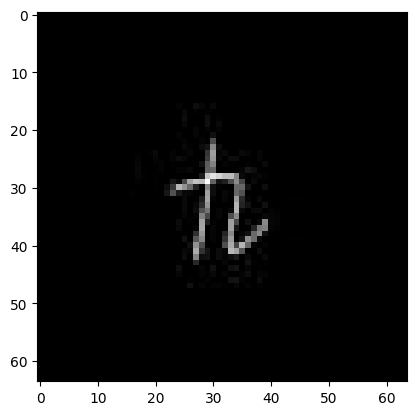

In [67]:
# Exemplo de uma imagem
index = 32
plt.imshow(X_train[index], cmap='gray')
print ("y = " + str(np.argmax(y_train[index])) + " (y_hot=" + str(y_train[index]) + ")")

## 3. Para você fazer

Você deve desenvolver uma rede neural usando a plataforma TensorFlow-Keras, para classificar os dígitos escritos em chinês.

Além de mostrar a configuração da rede utilizada, os parâmetros escolhidos para a compilação e treinamento, apresente pelo menos os seguintes resultados:

1. Resultado do processo de treinamento (gráficos);

2. Valores da função de custo e da métrica para os dados de treinamento e teste (use o método evaluate);

3. Gráfico com as classes previstas junto com as classes reais dos dados de teste. Use círculos de cores diferentes para diferenciar as classe previstas das reais.

4. Matriz de confusão dos resulatdos para facilitar a análise de desempenho da sua rede.

Para entregar o seu trabalho, transforme o seu notebook em pdf e faça o upload do mesmo nesse espaço.  

## Configuração em vetores one hot

## Configuração e compilação da RNA

In [118]:
from tensorflow.keras import models
from tensorflow.keras import layers

# Configuração da Rna
rna = models.Sequential()
rna.add(layers.Dense(1024, activation='relu', input_shape=(4096,)))
rna.add(layers.Dense(480,activation='relu'))
rna.add(layers.Dense(256,activation='relu'))
rna.add(layers.Dense(15, activation='softmax'))

# Mostra resuma da rede
rna.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 1024)              4195328   
                                                                 
 dense_52 (Dense)            (None, 480)               492000    
                                                                 
 dense_53 (Dense)            (None, 256)               123136    
                                                                 
 dense_54 (Dense)            (None, 15)                3855      
                                                                 
Total params: 4,814,319
Trainable params: 4,814,319
Non-trainable params: 0
_________________________________________________________________


In [119]:
from tensorflow.keras import optimizers

# Define otimizador
adam = optimizers.Adam()

# Compilação da RNA
rna.compile(optimizer=adam, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=tf.keras.metrics.CategoricalAccuracy())

In [120]:
history = rna.fit(X_train_flat, y_train, epochs=30, batch_size=1024, validation_data=(X_test_flat, y_test))

Epoch 1/30
12/12 [==============================] - 9s 638ms/step - loss: 2.3882 - categorical_accuracy: 0.2368 - val_loss: 1.9703 - val_categorical_accuracy: 0.4213
Epoch 2/30
12/12 [==============================] - 6s 478ms/step - loss: 1.6508 - categorical_accuracy: 0.5211 - val_loss: 1.4984 - val_categorical_accuracy: 0.5603
Epoch 3/30
12/12 [==============================] - 8s 658ms/step - loss: 1.1555 - categorical_accuracy: 0.6636 - val_loss: 1.1585 - val_categorical_accuracy: 0.6367
Epoch 4/30
12/12 [==============================] - 6s 476ms/step - loss: 0.7992 - categorical_accuracy: 0.7642 - val_loss: 0.9173 - val_categorical_accuracy: 0.7020
Epoch 5/30
12/12 [==============================] - 8s 681ms/step - loss: 0.5605 - categorical_accuracy: 0.8316 - val_loss: 0.7766 - val_categorical_accuracy: 0.7603
Epoch 6/30
12/12 [==============================] - 6s 479ms/step - loss: 0.3924 - categorical_accuracy: 0.8899 - val_loss: 0.6817 - val_categorical_accuracy: 0.7863
Epoc

## Plot da Curva de Aprendizado

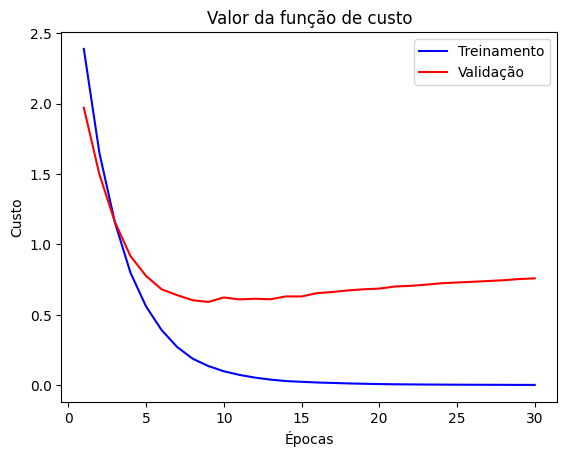

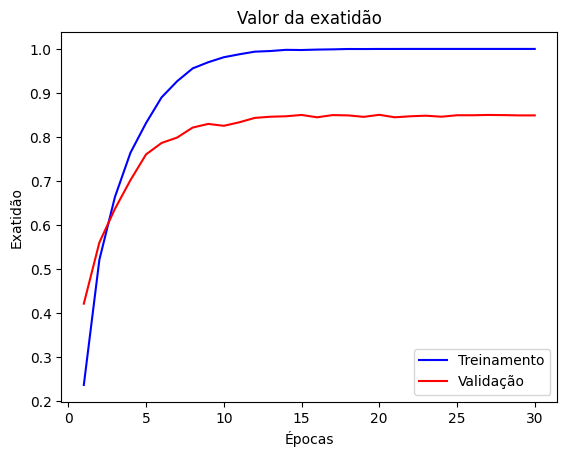

In [121]:
# Definição dos custos e exatidões
history_dict = history.history
custo = history_dict['loss']
exatidao = history_dict['categorical_accuracy']
custo_val = history_dict['val_loss']
exatidao_val = history_dict['val_categorical_accuracy']

# Cria vetor de épocas
epocas = range(1, len(custo) + 1)

# Gráfico do custo em função das épocas
custo = history_dict['loss']
plt.plot(epocas, custo, 'b', label='Treinamento')
plt.plot(epocas, custo_val, 'r', label='Validação')
plt.title('Valor da função de custo')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()
plt.show()

# Gráfico da exatidão em função das épocas
plt.plot(epocas, exatidao, 'b', label='Treinamento')
plt.plot(epocas, exatidao_val, 'r', label='Validação')
plt.title('Valor da exatidão')
plt.xlabel('Épocas')
plt.ylabel('Exatidão')
plt.legend()
plt.show()

## Custo e métricas para dados de treinamento e teste

In [123]:
# Calculo do custo e  exatidão para os dados de treinamento, validação e teste
custo_e_metricas_train = rna.evaluate(X_train_flat, y_train)
custo_e_metricas_test = rna.evaluate(X_test_flat, y_test)

94/94 [==============================] - 2s 16ms/step - loss: 0.7592 - categorical_accuracy: 0.8490


## Plot de Classes previstas X Classes reais

94/94 [==============================] - 2s 22ms/step


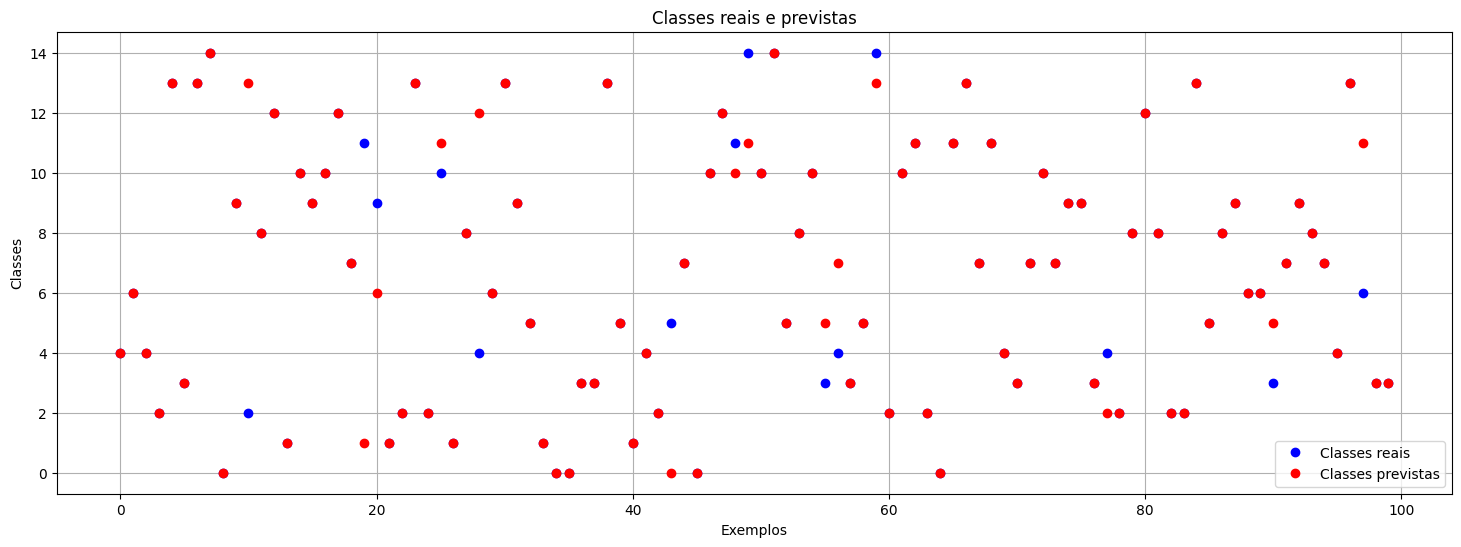

In [126]:
# Calcula das classes previstas
y_prev = rna.predict(X_test_flat)

# Identifica classe prevista e reais
classe_prev = np.argmax(y_prev, axis=1)
classe_real = np.argmax(y_test, axis=1)
# Gráfico das classes reais e previstas para os primeiros 100 exemplos de teste
plt.figure(figsize=(18,6))
plt.plot(classe_real[:100], 'bo', label='Classes reais')
plt.plot(classe_prev[:100], 'ro', label="Classes previstas")
plt.title('Classes reais e previstas')
plt.xlabel('Exemplos')
plt.ylabel('Classes')
plt.grid()
plt.legend()
plt.show()

## Matriz de Confusão

Matriz de confusão:
 [[192   0   0   0   0   6   0   0   0   2   0   0   0   0   0]
 [  0 167   1   0  10   0   8   2   0   3   1   2   1   5   0]
 [  0   2 152   0   7   0   3   1   0   7   0   2   4  16   6]
 [  0   1   0 179   0  15   2   0   0   1   0   2   0   0   0]
 [  0   8   8   0 150   0   3  18   2   2   0   0   3   5   1]
 [  6   0   0  11   0 180   0   0   0   3   0   0   0   0   0]
 [  0   2   2   4   3   0 178   1   0   2   0   5   0   3   0]
 [  0   3   1   0  19   0   2 163   1   0   0   1  10   0   0]
 [  0   2   2   0   6   1   0   4 183   1   0   0   1   0   0]
 [  0   2   6   0  11   1   4   4   3 162   1   3   3   0   0]
 [  0   1   2   0   0   3   0   0   0   3 172  19   0   0   0]
 [  1   5   0   0   1   2   1   0   0   3  22 159   0   4   2]
 [  0   4   1   0   2   0   1   5   0   1   0   1 180   3   2]
 [  0   1  22   0   4   0   7   0   0   2   0   3   6 150   5]
 [  0   0   5   0   1   0   0   0   0   0   0   2   0  12 180]]


<ipython-input-134-c1d4b36dce3c>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
<ipython-input-134-c1d4b36dce3c>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


<Figure size 1500x1500 with 0 Axes>

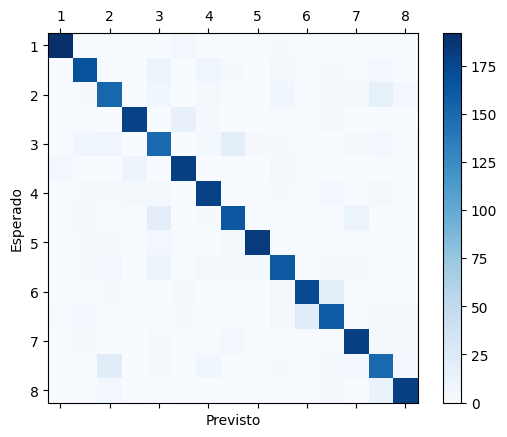

In [134]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true= classe_real, y_pred=classe_prev)

print('Matriz de confusão:\n', conf_mat)

matrix_labels = [i for i in range(0,16)]
labels = matrix_labels

plt.figure(figsize=(15,15))
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Previsto')
plt.ylabel('Esperado')
plt.show()